
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.8 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.6 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.6 MB/s eta 0:00:03
   ------------------ --------------------- 3.7

C:\Users\emad_\AppData\Local\Temp\ipykernel_16820\429601492.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=broker_counts.index, y=broker_counts.values, ax=axes[0, 0], palette="viridis")
C:\Users\emad_\AppData\Local\Temp\ipykernel_16820\429601492.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qos_counts.index, y=qos_counts.values, ax=axes[1, 0], palette="magma")


✅ Charts saved successfully as 'mqtt_analysis_charts.png'


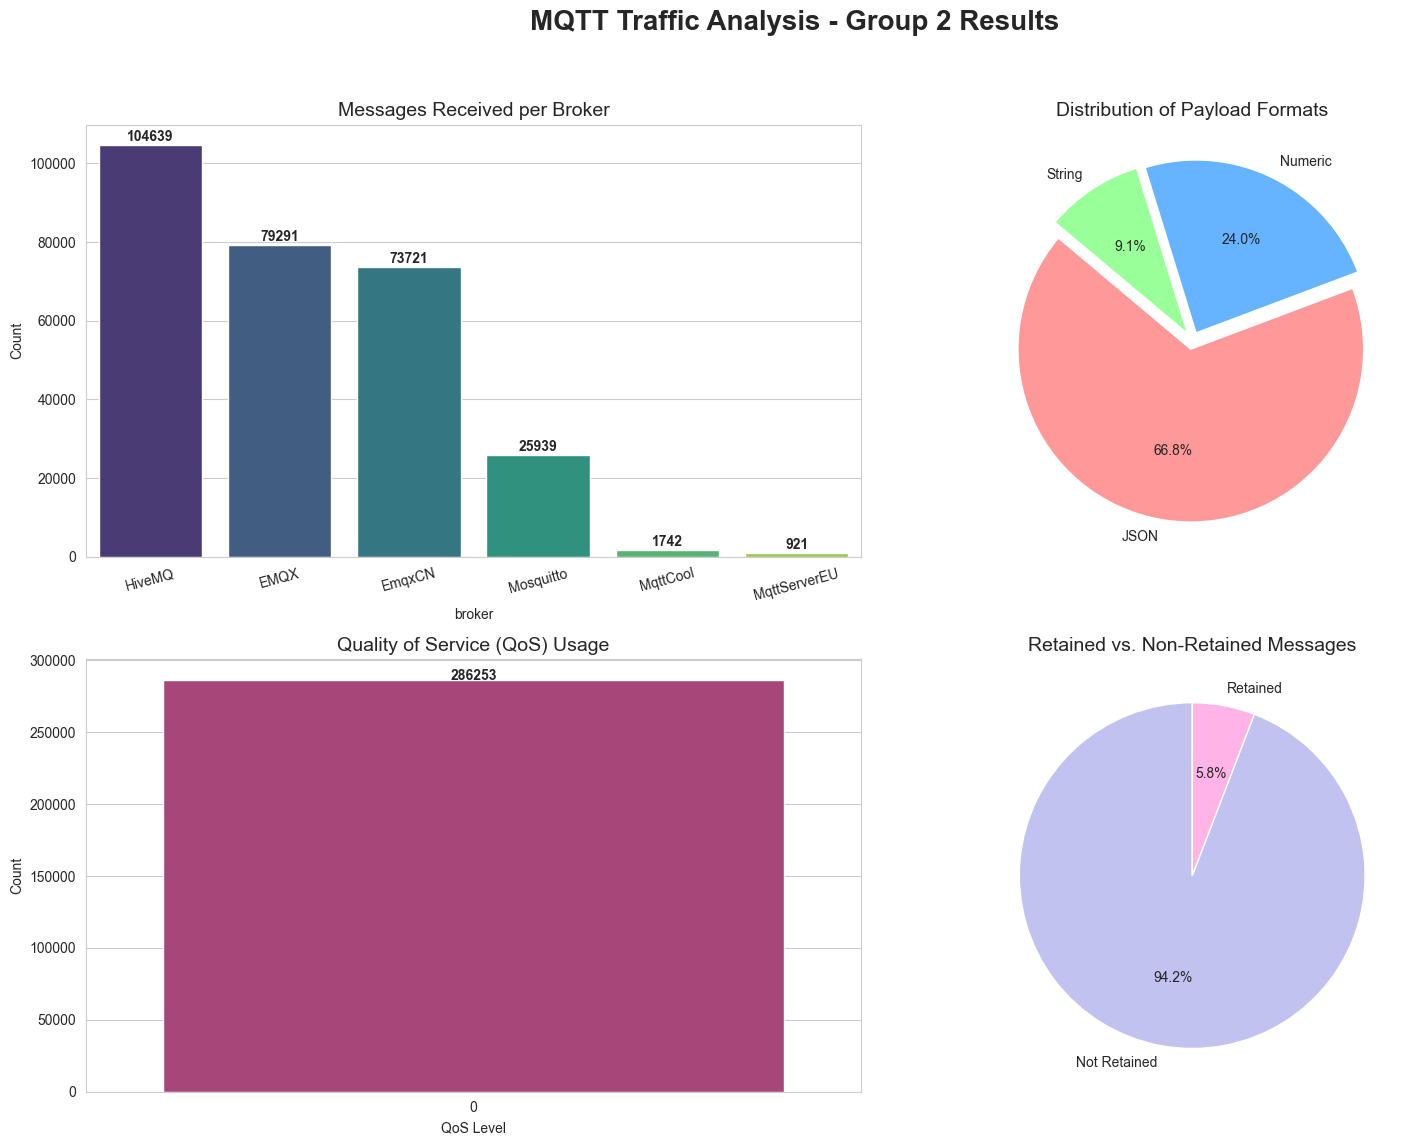

In [1]:
# ==========================================
# PHASE 3: Data Analysis & Visualization
# Goal: Analyze the captured CSV and generate charts for the report.
# Language: English Only
# ==========================================

# 1. Install necessary libraries (if not present)
%pip install matplotlib pandas seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---
INPUT_FILE = "mqtt_captured_data.csv"
OUTPUT_IMAGE = "mqtt_analysis_charts.png"

# --- LOAD DATA ---
try:
    print(f"Loading data from '{INPUT_FILE}'...")
    df = pd.read_csv(INPUT_FILE)
    print(f"✅ SUCCESS! Loaded {len(df)} records.")
except Exception as e:
    print(f"❌ ERROR: Could not load file. {e}")
    raise SystemExit

# --- DATA PROCESSING ---

# 1. Broker Traffic
broker_counts = df['broker'].value_counts()

# 2. Payload Type
type_counts = df['payload_type'].value_counts()

# 3. QoS Levels
qos_counts = df['qos'].value_counts().sort_index()

# 4. Retained Messages (Convert 0/1 to Text)
retain_counts = df['retain'].map({0: 'Not Retained', 1: 'Retained'}).value_counts()

# --- PRINT TEXT SUMMARY ---
print("\n" + "="*40)
print("        STATISTICAL SUMMARY")
print("="*40)
print(f"Total Messages:   {len(df)}")
print(f"Start Time:       {df['timestamp'].min()}")
print(f"End Time:         {df['timestamp'].max()}")
print("-" * 40)
print("Top Broker:       " + f"{broker_counts.index[0]} ({broker_counts.iloc[0]})")
print("Top Type:         " + f"{type_counts.index[0]} ({type_counts.iloc[0]})")
print("="*40 + "\n")

# --- GENERATE CHARTS ---
print("Generating charts...")

# Set visual style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('MQTT Traffic Analysis - Group 2 Results', fontsize=20, weight='bold')

# CHART 1: Broker Traffic (Bar Chart)
sns.barplot(x=broker_counts.index, y=broker_counts.values, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Messages Received per Broker', fontsize=14)
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=15)
# Add numbers on bars
for i, v in enumerate(broker_counts.values):
    axes[0, 0].text(i, v + 1000, str(v), ha='center', fontweight='bold')

# CHART 2: Payload Types (Pie Chart)
axes[0, 1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
               startangle=140, colors=['#ff9999','#66b3ff','#99ff99'], explode=[0.05]*len(type_counts))
axes[0, 1].set_title('Distribution of Payload Formats', fontsize=14)

# CHART 3: QoS Levels (Bar Chart)
sns.barplot(x=qos_counts.index, y=qos_counts.values, ax=axes[1, 0], palette="magma")
axes[1, 0].set_title('Quality of Service (QoS) Usage', fontsize=14)
axes[1, 0].set_xlabel('QoS Level')
axes[1, 0].set_ylabel('Count')
# Add numbers
for i, v in enumerate(qos_counts.values):
    axes[1, 0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# CHART 4: Retained Messages (Pie Chart)
axes[1, 1].pie(retain_counts, labels=retain_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=['#c2c2f0','#ffb3e6'])
axes[1, 1].set_title('Retained vs. Non-Retained Messages', fontsize=14)

# Save the final image
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(OUTPUT_IMAGE, dpi=300)
print(f"✅ Charts saved successfully as '{OUTPUT_IMAGE}'")

# Show charts
plt.show()